In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [3]:
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

In [4]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.7
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

In [5]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [6]:
pcaTrain = PCA(n_components=40).fit(X)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(X) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X))
print(compressed_dataset_X)

PCA(n_components=40)
<class 'numpy.ndarray'>
19229
[[-0.65471941 -0.29535736 -0.31996118 ... -0.02476821  0.02630215
  -0.01799283]
 [-0.68710967 -0.18605864 -0.23986857 ...  0.00912638 -0.03442657
   0.00517279]
 [-0.73738486 -0.27023304 -0.17581102 ... -0.00921781  0.01384213
   0.00193407]
 ...
 [ 0.75467925 -0.32225457  0.11722476 ...  0.03040849 -0.03605868
  -0.00502355]
 [-0.66822584 -0.35754112  0.25867568 ... -0.056738    0.04153932
   0.00319434]
 [-0.71763516 -0.19730181 -0.16862463 ... -0.00555394 -0.01344623
   0.00963887]]


In [7]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset)
print(len(X_train))

15439


In [8]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
15439
[[-0.65471941 -0.29535736 -0.31996118 ... -0.02476821  0.02630215
  -0.01799283]
 [-0.68710967 -0.18605864 -0.23986857 ...  0.00912638 -0.03442657
   0.00517279]
 [-0.73738486 -0.27023304 -0.17581102 ... -0.00921781  0.01384213
   0.00193407]
 ...
 [ 0.75467925 -0.32225457  0.11722476 ...  0.03040849 -0.03605868
  -0.00502355]
 [-0.66822584 -0.35754112  0.25867568 ... -0.056738    0.04153932
   0.00319434]
 [-0.71763516 -0.19730181 -0.16862463 ... -0.00555394 -0.01344623
   0.00963887]]
<class 'numpy.ndarray'>
3790
[[ 0.7424745  -0.28872151  0.02212931 ...  0.02272456 -0.02780355
  -0.00614195]
 [ 0.94388765 -0.54661335  0.82279864 ...  0.00347016  0.00334013
  -0.00505378]
 [ 0.04959737  1.18300923  0.00293797 ... -0.02949485  0.02085479
   0.00481577]
 ...
 [ 0.11550793  1.12838147 -0.07830297 ...  0.00901678  0.01162977
   0.01070872]
 [-0.74357677 -0.30813988 -0.00846541 ...  0.05982456 -0.09216889
   0.00677878]
 [ 0.76093266 -0.31924965  0.17715558 .

# tune Random-Forest model

In [9]:
# train the model with random parameter
from sklearn.ensemble import RandomForestClassifier
# Preparing the regressor and fitting data with some parameters
model = RandomForestClassifier(

    criterion="entropy",
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=25,
    n_estimators=348,
) 

model.fit(compressed_dataset_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=348)

In [10]:
# Finding mean absolute error
preds = model.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.28021108179419524

In [11]:
# Defining the best parameter with optuna
from sklearn.model_selection import KFold
K = 5 # 5 fold cross validation
kf = KFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned = np.array(compressed_dataset_X)
target_train_tunned = np.array(y)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds = np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective(trial):

 for train_index, val_index in (kf.split(compressed_dataset_X)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
            'n_estimators':trial.suggest_int('n_estimators',50,500),
            'criterion':trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss']),
            'max_depth':trial.suggest_int('max_depth',20,50),
            'min_samples_split':2,
            'min_samples_leaf':1,
            'max_features':trial.suggest_categorical('max_features',['sqrt', 'log2', None]),
            'random_state':trial.suggest_int('random_state',0,10),
       
      
        }
    model = RandomForestClassifier(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X


 
 print(len(oof_preds))
      
 mae = mean_absolute_error(target_train_tunned, oof_preds)
        
 return mae

In [12]:
# this is the main optuna for optimizing a object-->"objective"
study = optuna.create_study(direction='minimize',study_name="XG_tune")

[I 2024-03-01 20:18:37,913] A new study created in memory with name: XG_tune


In [13]:

study.optimize(objective, n_trials=5) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-03-01 20:25:23,502] Trial 0 finished with value: 0.35103229497113736 and parameters: {'n_estimators': 347, 'criterion': 'log_loss', 'max_depth': 24, 'max_features': 'sqrt', 'random_state': 8}. Best is trial 0 with value: 0.35103229497113736.


19229


[I 2024-03-01 20:29:47,069] Trial 1 finished with value: 0.3591970461282438 and parameters: {'n_estimators': 58, 'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'random_state': 7}. Best is trial 0 with value: 0.35103229497113736.


19229


[I 2024-03-01 20:37:01,981] Trial 2 finished with value: 0.35560871600187216 and parameters: {'n_estimators': 436, 'criterion': 'entropy', 'max_depth': 22, 'max_features': 'log2', 'random_state': 1}. Best is trial 0 with value: 0.35103229497113736.


19229


[I 2024-03-01 20:55:50,586] Trial 3 finished with value: 0.3454677830360393 and parameters: {'n_estimators': 171, 'criterion': 'entropy', 'max_depth': 48, 'max_features': None, 'random_state': 1}. Best is trial 3 with value: 0.3454677830360393.


19229


[I 2024-03-01 21:33:18,740] Trial 4 finished with value: 0.3444796921316761 and parameters: {'n_estimators': 344, 'criterion': 'entropy', 'max_depth': 42, 'max_features': None, 'random_state': 2}. Best is trial 4 with value: 0.3444796921316761.


19229
Number of finished trials: 5
Best trial: {'n_estimators': 344, 'criterion': 'entropy', 'max_depth': 42, 'max_features': None, 'random_state': 2}


In [14]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5
Best trial:
  Value:  0.3444796921316761
  Params: 
    n_estimators: 344
    criterion: entropy
    max_depth: 42
    max_features: None
    random_state: 2


# process the whole dataset

In [15]:
filename_2 = '../shot_listed_dataset/Cover_type_whole_genuine_dataset_normalization.csv'
dataset_2=getData(filename_2).values.tolist()
random.shuffle(dataset_2)

dataset_2=pd.DataFrame(dataset_2) #from dataset_list to dataset_dataframe after suffling
print(dataset_2)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.672888  0.141667  0.045455                          0.184681   
1   0.671332  0.155556  0.030303                          0.151754   
2   0.726801  0.386111  0.136364                          0.191840   
3   0.721877  0.430556  0.272727                          0.173228   
4   0.672628  0.125000  0.030303                          0.109520   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.000000                         0.071659   
1                       -0.009983                         0.054798   
2                        0.108153                         0.446817   
3                        0.196339                         0.434172   
4                       -0.001664                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2    

In [16]:
# checking for NaN value
result = dataset_2.columns[dataset_2.isna().any()].tolist()
result

[]

In [17]:
X_2=dataset_2.iloc[:,0:-1]
y_2=dataset_2.iloc[:,-1]
X_train_2, y_train_2, X_test_2, y_test_2 = split_data(dataset_2)

In [18]:
pcaTrain_2 = PCA(n_components=30).fit(X_2)# --train-- pca with the "dataset" Dataframe
print(pcaTrain_2)
compressed_dataset_X_2 = pcaTrain.transform(X_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters


compressed_dataset_X_train_2= pcaTrain.transform(X_train_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train_2))
print(len(compressed_dataset_X_train_2))


compressed_dataset_X_test_2= pcaTrain.transform(X_test_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test_2))
print(len(compressed_dataset_X_test_2))


PCA(n_components=30)
<class 'numpy.ndarray'>
464991
<class 'numpy.ndarray'>
116021


# fit the Random-Forest

In [19]:

K = 5 # 5 fold cross validation
kf = KFold(n_splits = K, random_state = 42, shuffle = True)

In [20]:
###################### early-stopping #############################

# reduce the n_estimator for removing overfitting
# SEED = 42 #for random_state
EARLY_STOP_NUM = 2
# MAX_DEPTH = 2 # for max_depth
# IS_WARM_START = True #for warm_start
def EarlyStopping(y_val,y_val_pred,y_train,y_train_pred,error_going_up):
    
    val_error = mean_absolute_error(y_val, y_val_pred)
    print('validation_error',val_error)
    train_error=mean_absolute_error(y_train,y_train_pred)
    print('train_error',train_error)
    if val_error < train_error:
        error_going_up = 0
    else:
        error_going_up += 1
        # if error_going_up == EARLY_STOP_NUM:
            # early stopping
    return error_going_up        

In [22]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train = np.array(compressed_dataset_X)
target_train = np.array(y)

test = np.array(compressed_dataset_X_test)
target_test = np.array(y_test)

# error_going_up=0

test_preds = np.zeros((len(test)))
oof_preds = np.zeros((len(train)))
for train_index, val_index in tqdm(kf.split(compressed_dataset_X), total=5):
    train_X, valid_X = train[train_index], train[val_index]
    train_y, valid_y = target_train[train_index], target_train[val_index]
    rf_params = study.best_trial.params
    model = RandomForestClassifier(**rf_params,warm_start=True)
    model.fit(train_X, train_y)
    # for train accuracy
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds
    # for test accuracy
    preds_test = model.predict(test)
    test_preds += (preds_test)/5

    #early_stopping
    preds_train = model.predict(train_X)
    error_going_up=EarlyStopping(valid_y,preds,train_y,preds_train,error_going_up=0)
    if error_going_up==EARLY_STOP_NUM:
        print('early stopping occurs!!')
        break

# print(np.abs(oof_preds-target_train).mean())

 20%|██        | 1/5 [07:46<31:04, 466.07s/it]

validation_error 0.33541341653666146
train_error 0.0


 40%|████      | 2/5 [15:36<23:26, 468.75s/it]

validation_error 0.328133125325013
train_error 0.0


 60%|██████    | 3/5 [23:29<15:40, 470.41s/it]

validation_error 0.33203328133125326
train_error 0.0


 80%|████████  | 4/5 [31:16<07:49, 469.33s/it]

validation_error 0.3715548621944878
train_error 0.0


100%|██████████| 5/5 [39:23<00:00, 472.70s/it]

validation_error 0.3552665799739922
train_error 0.0


In [23]:
from sklearn.metrics import accuracy_score
# valid_Acc_SVC=accuracy_score(target_train,oof_preds)
# print(valid_Acc_SVC)

# another technique for calculate test accuracy
test_Acc_SVC=accuracy_score(target_test,test_preds.round())
print(test_Acc_SVC)

0.7881266490765172


In [24]:
#validation accuracy
valid_Acc=accuracy_score(target_train,oof_preds)
print(valid_Acc)

0.8575068906339384


In [25]:
#validation loss
valid_loss=mean_absolute_error(target_train,oof_preds)
valid_loss

0.3444796921316761

In [29]:
# train accuracy
train_Acc=model.score(compressed_dataset_X,y)
print(train_Acc)

0.9712413542045868


In [27]:
#train loss
preds_train = model.predict(compressed_dataset_X_train)
train_loss=mean_absolute_error(y_train,preds_train)
train_loss

1.0498089254485394

In [30]:
# test_accuracy
test_Acc=model.score(compressed_dataset_X_test,y_test)
print(test_Acc)

0.8224274406332454


# CM

In [73]:
test_preds_final=np.floor(test_preds)
test_preds_final

array([4., 3., 1., ..., 1., 1., 4.])

In [74]:
count=0
for i in range(0,len(test_preds_final)):
    if test_preds_final[i]==7:
        count+=1
        test_preds_final[i]=0

In [76]:
count=0
for i in range(0,len(test_preds_final)):
    if test_preds_final[i]==0:
        count+=1
count

536

In [80]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_final)
cm

array([[536,   0,   0,   0,   0,  18,   2],
       [  0, 523,  32,   0,   0,   0,   0],
       [  0,  93, 442,   1,   0,   0,   0],
       [  0,   0,   5, 541,   0,   0,   0],
       [  0,   0,   0,  12, 521,   0,   0],
       [  0,   0,   0,   0,  26, 490,   0],
       [  0,   0,   0,   0,   0,  94, 454]], dtype=int64)

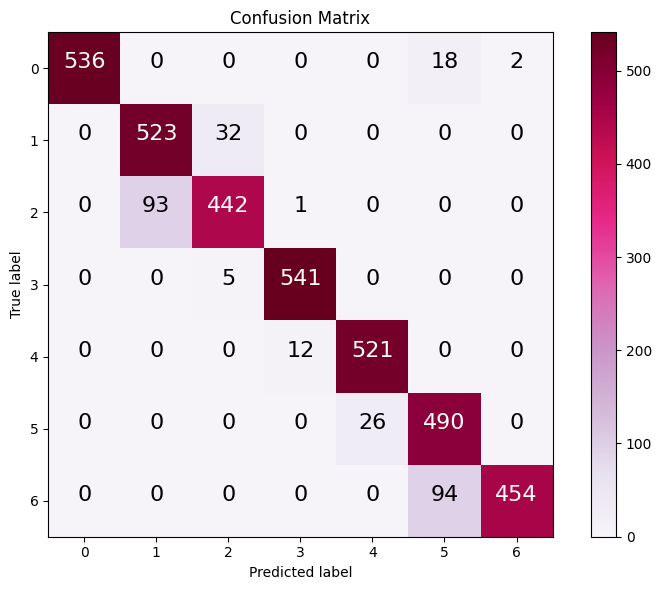

In [82]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt

# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


# ROC

In [83]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [84]:
# Binarize the output
y_train = label_binarize(y_train,classes=[0,1,2,3,4,5,6])
n_classes = y_train.shape[1]
print(n_classes)
print(y_train[0])

7
[0 0 1 0 0 0 0]


In [85]:
# Binarize the output (y_test)
y_test = label_binarize(y_test,classes=[0,1,2,3,4,5,6])
n_classes = y_test.shape[1]
print(n_classes)
print(y_test[0])

7
[0 0 0 0 1 0 0]


In [86]:
# Learn to predict each class against the other
classifier = RandomForestClassifier(**rf_params,warm_start=True)

# Train the classifier
classifier.fit(compressed_dataset_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=42, max_features=None,
                       n_estimators=344, random_state=2, warm_start=True)

In [121]:
test_pred_final_2=classifier.predict_proba(compressed_dataset_X_test)
test_pred_final_sample=pd.DataFrame(test_pred_final_2[0])
test_pred_final_sample



,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
3785,1.000000,0.000000
3786,0.982558,0.017442
3787,1.000000,0.000000
3788,0.892442,0.107558


In [110]:
test_pred_final_2[4]

array([[0.        , 1.        ],
       [0.98255814, 0.01744186],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.0494186 , 0.9505814 ]])

In [123]:
# Compute ROC curve and ROC area for each class
fpr = dict() #dictionary
tpr = dict()
roc_auc = dict()
for i in range(0,n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pd.DataFrame(test_pred_final_2[i]).iloc[:,0])
    roc_auc[i] = auc(tpr[i],fpr[i], )

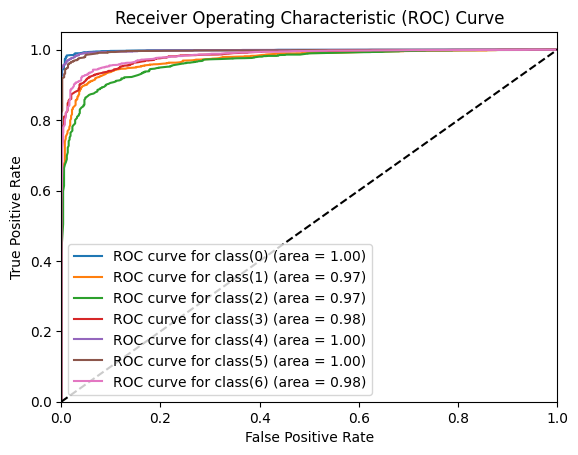

In [124]:
# Plot ROC curve for each class
plt.figure()
for i in range(0,n_classes):
    plt.plot(tpr[i],fpr[i],  label='ROC curve for class(%i) (area = %0.2f)' % (i,roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="best")
plt.show()

# others

In [127]:
cm

array([[536,   0,   0,   0,   0,  18,   2],
       [  0, 523,  32,   0,   0,   0,   0],
       [  0,  93, 442,   1,   0,   0,   0],
       [  0,   0,   5, 541,   0,   0,   0],
       [  0,   0,   0,  12, 521,   0,   0],
       [  0,   0,   0,   0,  26, 490,   0],
       [  0,   0,   0,   0,   0,  94, 454]], dtype=int64)

In [126]:
import numpy as np

# Assuming cm is the confusion matrix
# Assuming you have defined target_test and test_preds elsewhere in your code

# Calculate precision, recall, and F1 score from the confusion matrix
def calculate_metrics(cm):
    # Precision = TP / (TP + FP)
    precision = np.diag(cm) / np.sum(cm, axis=0)

    # Recall = TP / (TP + FN)
    recall = np.diag(cm) / np.sum(cm, axis=1)

    # F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Handle possible NaN values due to division by zero
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)
    f1 = np.nan_to_num(f1)

    return precision, recall, f1

precision, recall, f1 = calculate_metrics(cm)

print("Precision:", sum(precision)/len(precision))
print("Recall:", sum(recall)/len(recall))
print("F1 Score:", sum(f1)/len(f1))

Precision: 0.9300502202792328
Recall: 0.9253437087036829
F1 Score: 0.9250390736276233
